<a href="https://colab.research.google.com/github/miketriana/cap4630-wocjan/blob/master/HW_5/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 5

For this assignment I will be going over some of the main topics that I learned in this course. I will explain a general summary of each topic and provide some brief examples to demonstrate them in practice.

##General Concepts

###Artificial Intelligence

Artificial intelligence, or AI, is a broad term that encompasses many different things. In general, it describes the use of computers to simulate human behavior.

###Machine Learning

Machine learning is a field of artificial intelligence in which AI programs adjust their own behavior in response to the data that they see. In other words, they "learn" from their experiences. Rather than use a set of algorithmic rules to produce an output, the programs learn by looking at examples of predetermined outputs and coming up with a set of rules that would also produce the same outputs.

###Deep Learning

Deep learning is a subset of machine learning which uses algorithms called neural networks to predict an outcome for each set of inputs. The inputs that are given to the network are known as features. The features are transformed by weights and biases associated with each node in the network until it produces an output. Through the process of machine learning, the network optimizes its weights and biases to produce more accurate outputs.

Deep learning is a subset of machine learning, which is a subset of artificial intelligence.

##Basic Concepts

###Linear Regression

Linear regression is a method by which machine learning is used to determine the relationship between a dependent variable and one or more independent variables. Essentially, it determines the line (or curve, plane, etc) of best fit for a set of data points.

The equation for a linear relationship is
$$y = mx + b$$
where $y$ is the dependent variable, $m$ is the slope of the line, $x$ is the independent variable, and $b$ is the y-intercept or bias.

In machine learning, the dependent variable is known as the label, while each independent variable is known as a feature. A relationship may be affected by one or more features. A machine learning model attempts to produce a prediction for each set of features that matches the label. Therefore, the equation can be written as follows:
$$\hat{y} = b + w_1x_1 + w_2x_2 + ... + w_nx_n$$

where $\hat{y}$ is the prediction, $b$ is the bias, $w_1, ... w_n$ are the weights, and $x_1, ... x_n$ are the features.

Machine learning adjusts the values of the weights and bias to produce more accurate predictions.

###Logistic Regression

Logistic regression is similar to linear regression. However, rather than determining the parameters of a linear relationship, logistic regression determines the parameters of a logistic model. Logistic models are used to predict probability, such as the probability that an event will occur or the probability that an image contains a certain object. Neural networks trained with logistic regression produce a prediction between 0 and 1 based on a set of inputs. In most cases, 0 represents false, or certainly not, while 1 represents true or certain. Some models may produce a series of values representing the probabilities of several conditions, for example the probability that an image contains a dog, contains a cat, contains a mouse, etc.

###Gradients

In order to optimize itself, a machine learning model must have a way to measure the errors in its predictions, so that it may adjust its parameters to minimize the error. To do this, it uses a loss function $L$ to compute the "loss" for any set of parameters it estimates, based upon the difference between the predictions it produces and the real values of the labels.

Once the loss for a particular model is computed, it can be used to correct the parameters and point the model in the right direction. This is done by computing the gradient of the loss function, a vector composed of the partial derivaties of the loss function with respect to each of the weights.

$$\nabla{L} = \begin{bmatrix} {\partial L}/{\partial w_1} \\ {\partial L}/{\partial w_2} \\ ... \\ {\partial L}/{\partial w_n}\end{bmatrix}$$

Since the gradient is a vector, it has a direction and magnitude. One property of the gradient is that it always points in the direction where the loss function increases. Therefore, by adjusting each parameter by the negative of the gradient, the loss can be reduced.

###Gradient Descent

Gradient descent is an iterative approach to correcting the errors in a model's predictions by adjusting the parameters based on the gradient. The model begins by selecting a random starting value for each parameter. The algorithm then calculates the gradient of the loss function for this version of the model. The parameters of the model are then updated by moving them in the direction of the negative gradient:

$$w = w - \alpha\nabla{L}$$

$\alpha$ is a scalar value called the learning rate. This value defines how much each parameter is adjusted during each iteration. When the learning rate is high, larger adjustments are made each step.

Once the parameters are adjusted, the algorithm calculates the gradient for the new model and the process repeats. This may go on for a set number of iterations, or until the model converges on a satisfactory point.

Choosing the learning rate is important to the efficiency of gradient descent. A learning rate that is too small will cause the process to take too long, while one that is too high will cause the algorithm to repeatedly overshoot the desired minimum and fluctuate.

##Building a Model

Keras is a Python framework that makes it easy to build and train deep-learning models. It comes with predefined features for creating a model and adding layers. Here is a snippet from homework 3 which creates a simple model for binary classification based on two features:

In [0]:
%tensorflow_version 2.x
import tensorflow.keras as keras

In [2]:
network = keras.models.Sequential()
network.add(keras.layers.Dense(1, activation="sigmoid", input_shape=(2,)))
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


This model contains only a single layer with two inputs and one output. The summary shows there are 3 parameters to be trained - a weight for each parameter and a bias. Setting the activation function to sigmoid ensures that the output is a value between 0 and 1.

There are many different ways a model can be built. Models designed to solve more complex problems may contain many more layers.

##Compiling a Model

The model defined above can be compiled by simply calling its `compile()` function.

In [0]:
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

The most important parameters here are the optimizer and loss function. The optimizer determines how to update the parameters of the model with each iteration. It defines a specific implementation of gradient descent. This example uses the RMSprop optimizer.

The loss function is the method used to measure the error and determine how close the model is to making accurate predictions. This model uses the binary cross entropy loss function, since it a binary classification model.

##Training a Model

Training a model can be done with the `fit()` function. Training requires two data sets. One data set is the training data set, which contains a collection of entries each with their own features and label. The model is trained on the training data set until its predictions for each entry match closely to the labels. The other data set is the testing data set or validation data set, which contains data not used to train the model. The purpose of the validation data set is to test how accurate the model is on data it has not seen, so that it does not become accurate only on the data it is trained on. For this example, I will generate these data sets randomly based on a simple linear function.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random

def get_random_data(w, b, mu, sigma, m):
    data = np.zeros((m, 2))
    labels = np.zeros((m, 1))

    for i in range(m):
        # Randomly choose class label 0 or 1
        c = random.choice([0, 1])

        # Choose feature x1 randomly within the interval [0, 1)
        x_1 = random.random()

        # Generate noise based on normal distribution
        n = np.random.default_rng().normal(mu, sigma)
        # Choose feature x2 based on x1, weight, bias, label, and noise
        x_2 = w * x_1 + b + ((-1) ** c) * n

        # Update features and label
        data[i][0] = x_1
        data[i][1] = x_2
        labels[i][0] = c

    return [data, labels]

In [0]:
# Generate training and testing data sets
w = 1.5
b = -0.3
mu = 0.2
sigma = 0.1
ds_train = get_random_data(w, b, mu, sigma, 8000)
ds_test = get_random_data(w, b, mu, sigma, 2000)

train_data = ds_train[0]
train_labels = ds_train[1]
test_data = ds_test[0]
test_labels = ds_test[1]

In [6]:
# Train for 100 iterations
epochs = 100
results = network.fit(train_data, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=100, 
                      validation_data=(test_data, test_labels))

Epoch 1/100
80/80 [==============================] - 0s 3ms/step - loss: 0.6460 - accuracy: 0.6369 - val_loss: 0.6352 - val_accuracy: 0.6675
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6378 - accuracy: 0.6456 - val_loss: 0.6285 - val_accuracy: 0.6705
Epoch 3/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6308 - accuracy: 0.6513 - val_loss: 0.6228 - val_accuracy: 0.6720
Epoch 4/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6245 - accuracy: 0.6547 - val_loss: 0.6172 - val_accuracy: 0.6840
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6188 - accuracy: 0.6603 - val_loss: 0.6122 - val_accuracy: 0.6870
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6134 - accuracy: 0.6696 - val_loss: 0.6071 - val_accuracy: 0.6880
Epoch 7/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6084 - accuracy: 0.6755 - val_loss: 0.6023 - val_accuracy: 0.6930
Epoch 8/100
8

Displaying the training history, we can see the progress of how the loss decreases with each iteration:

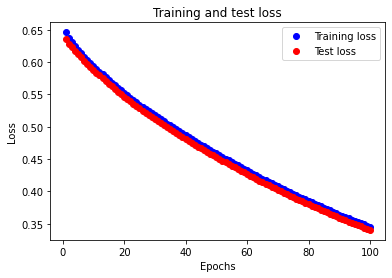

In [7]:
history_dict = results.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

These results show that the loss is decreasing nicely. One thing to note is that the training loss often ends up lower than the test loss. This is usually to be expected. However, if the test loss flattens off while the training loss continues to fall, this may mean that the model is becoming optimized too specifically to the training data, but is not improving in its ability to respond to new data. This is called overfitting. Various precautions can be taken to avoid overfitting, including redesigning the architecture of the model and limiting the amount of training.

##Using a Pre-Trained Model

In some cases, it may save time to adapt a pretrained model for your own purposes rather than train a model from scratch. In homework 4, I adapted and built upon a pretrained convolutional neural network (CNN) to create an image classifier. CNNs are used to extract features from image data. They learn how to extract features like textures and shapes through machine learning. These features are then fed into a component called the classifier, which classifies the image into one or more categories.

Rather than build and train a CNN from scratch, I imported one from Keras and added a classifier onto it.

In [8]:
from keras.applications.xception import Xception

conv_base = Xception(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))

conv_base.summary()

Using TensorFlow backend.


Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

As the summary shows, the CNN has many of its own trainable parameters. However, since it has already been trained, we do not want to retrain it along with the classifier. Luckily, both components can be trained independently by changing the `trainable` property of the CNN. This freezes the layers of the CNN so they are not trained along with the rest of the model.

In [0]:
conv_base.trainable = False

The CNN can be added into a model just like any other layer:

In [10]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               13107456  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 33,969,193
Trainable params: 13,107,713
Non-trainable params: 20,861,480
_________________________________________________________________


If we wish to fine tune the CNN, we can unfreeze some layers to make them trainable. We have complete control to choose which layers are trainable. For fine tuning, it is often better to unfreeze the higher-level layers (the ones closer to the end).

In [11]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'add_11':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
    print(layer.name + "\t\t\tTrainable")
  else:
    layer.trainable = False
    print(layer.name + "\t\t\tUntrainable")

input_1			Untrainable
block1_conv1			Untrainable
block1_conv1_bn			Untrainable
block1_conv1_act			Untrainable
block1_conv2			Untrainable
block1_conv2_bn			Untrainable
block1_conv2_act			Untrainable
block2_sepconv1			Untrainable
block2_sepconv1_bn			Untrainable
block2_sepconv2_act			Untrainable
block2_sepconv2			Untrainable
block2_sepconv2_bn			Untrainable
conv2d_1			Untrainable
block2_pool			Untrainable
batch_normalization_1			Untrainable
add_1			Untrainable
block3_sepconv1_act			Untrainable
block3_sepconv1			Untrainable
block3_sepconv1_bn			Untrainable
block3_sepconv2_act			Untrainable
block3_sepconv2			Untrainable
block3_sepconv2_bn			Untrainable
conv2d_2			Untrainable
block3_pool			Untrainable
batch_normalization_2			Untrainable
add_2			Untrainable
block4_sepconv1_act			Untrainable
block4_sepconv1			Untrainable
block4_sepconv1_bn			Untrainable
block4_sepconv2_act			Untrainable
block4_sepconv2			Untrainable
block4_sepconv2_bn			Untrainable
conv2d_3			Untrainable
block4_pool			Untrain

##Other Concepts

In addition to the concepts of machine learning described above, I also gained a lot of experience and knowledge in other topics and skills. This course was one of my first experiences working extensively with Python. Luckily, Python is quite an easy language to pick up and start doing impressive things with.

I was also introduced to Google Colaboratory. This service is great for learning AI and machine learning, since developers are able to take advantage of Google's processing resources rather than relying on their own hardware. If I had not had access to Google Colab, completing the assignments for this course would have taken much longer.

This course also made me familiar with $\LaTeX$, a document markup language widely used in acedemia. It was very helpful for formatting the mathematical figures used in my Colab notebooks, including this one.

Plain text:
```
$$\nabla{L} = \begin{bmatrix} {\partial L}/{\partial w_1} \\ {\partial L}/{\partial w_2} \\ ... \\ {\partial L}/{\partial w_n}\end{bmatrix}$$
```

LaTeX: $$\nabla{L} = \begin{bmatrix} {\partial L}/{\partial w_1} \\ {\partial L}/{\partial w_2} \\ ... \\ {\partial L}/{\partial w_n}\end{bmatrix}$$